In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
from matplotlib import font_manager, rc
font_path = './samples/part4/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Part 4. 시각화 도구

## 4-1. Matplotlib - 기본 그래프 도구

#### 예제 4-1. 선 그래프

In [3]:
df = pd.read_excel('./samples/part4/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [4]:
df = df.fillna(method='ffill') # 결측치를 바로 앞 데이터로 채움

# 서울에서 다른 지역으로 이동한 경우만

mask = (df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [5]:
sr_one = df_seoul.loc['경기도']

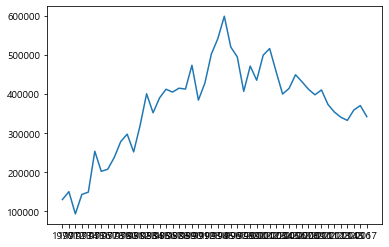

In [6]:
plt.plot(sr_one.index, sr_one.values)

#### 예제 4-2. 차트 제목, 축 이름 추가

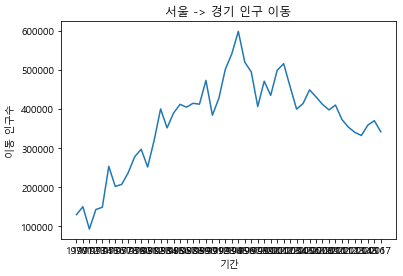

In [7]:
plt.plot(sr_one)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

#### 예제 4-4. 그래프 꾸미기

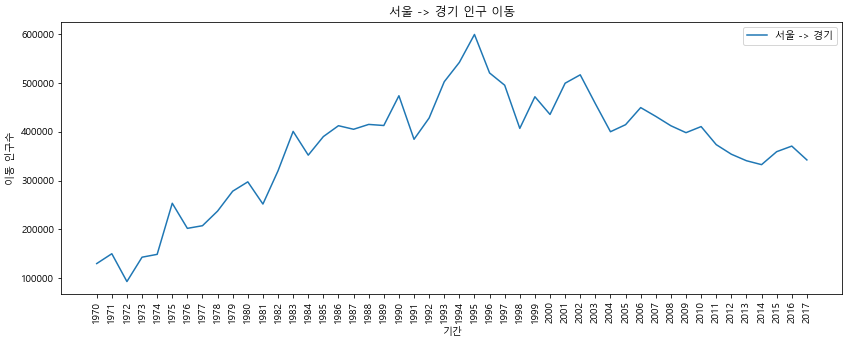

In [8]:
plt.figure(figsize=(14,5))
plt.xticks(rotation='vertical')
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기'], loc='best')

plt.show()

#### 예제 4-5. 스타일 서식 지정 등

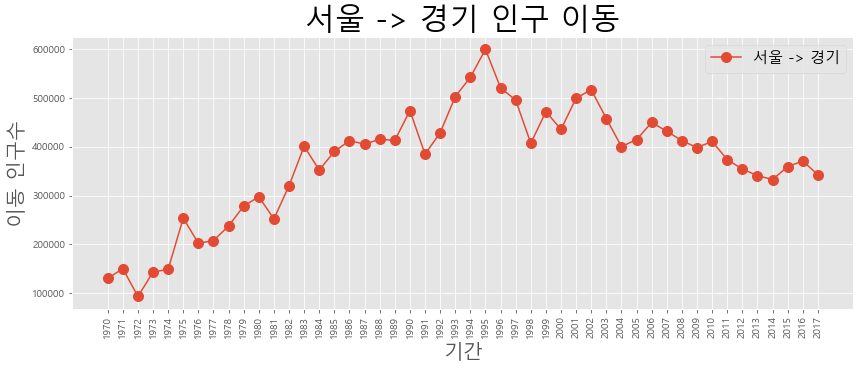

In [9]:
plt.style.use('ggplot')

plt.figure(figsize=(14,5))
plt.xticks(size = 10, rotation='vertical')
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize = 15)

plt.show()

#### 예제 4-6 Matplotlib 스타일 리스트 출력

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### 예제 4-7 matplotlib 스타일 리스트 출력

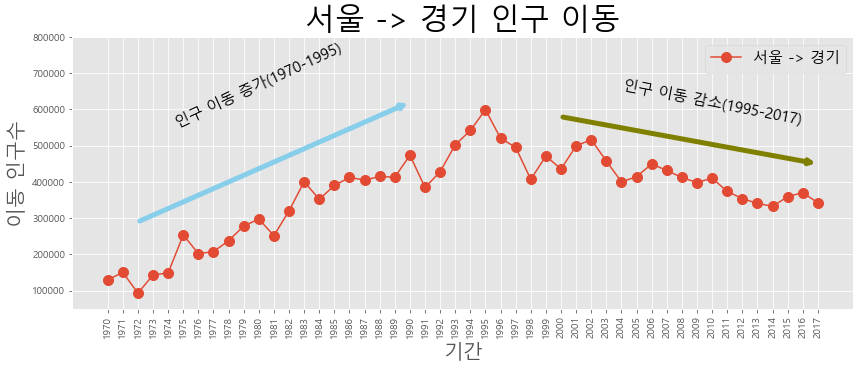

In [11]:
plt.style.use('ggplot')

plt.figure(figsize=(14,5))
plt.xticks(size = 10, rotation='vertical')
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize = 15)

plt.ylim(50000, 800000)

plt.annotate('',
            xy=(20, 620000), # 화살표의 머리 부분(끝점)
            xytext=(2, 290000), # 화살표의 꼬리 부분(시작점)
            xycoords='data', # 좌표 체계
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)) # 화살표 서식

plt.annotate('',
            xy=(47, 450000), 
            xytext=(30, 580000), 
            xycoords='data',
            arrowprops=dict(arrowstyle='->', color='olive', lw=5))


# 주석 표시 - 텍스트

plt.annotate('인구 이동 증가(1970-1995)', # 텍스트 입력
            xy = (10, 550000), # 텍스트 위치 기준점
            rotation = 25, # 텍스트 회전 각도
            va = 'baseline', # 텍스트 상하 정렬
            ha = 'center', # 텍스트 좌우 정렬
            fontsize = 15) # 텍스트 크기

plt.annotate('인구 이동 감소(1995-2017)', # 텍스트 입력
            xy = (40, 560000), # 텍스트 위치 기준점
            rotation = -11, # 텍스트 회전 각도
            va = 'baseline', # 텍스트 상하 정렬
            ha = 'center', # 텍스트 좌우 정렬
            fontsize = 15) # 텍스트 크기
plt.show()

#### 예제 4-8. Matplotlib 소개

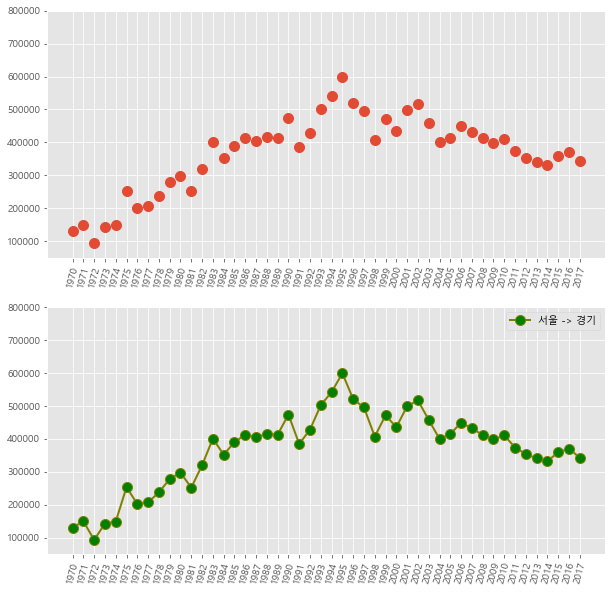

In [12]:

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

#### 예제 4-9. axe 객체 그래프 꾸미기

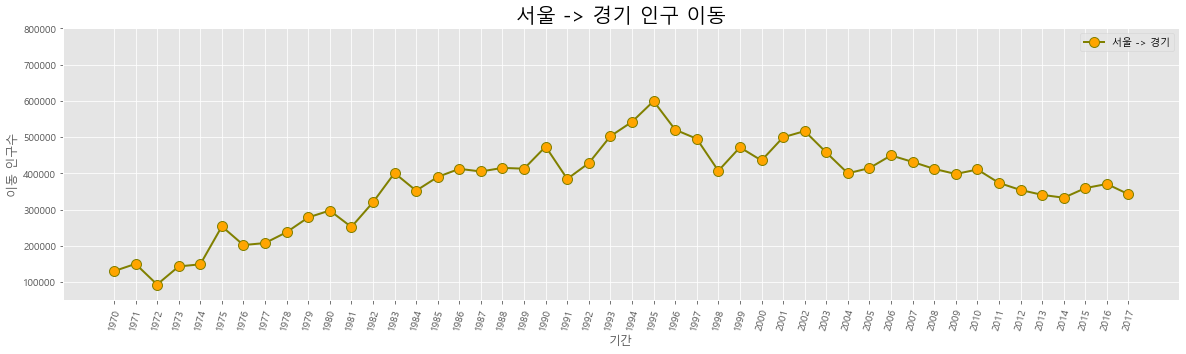

In [13]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc = 'best')

ax.set_ylim(50000, 800000)

ax.set_title('서울 -> 경기 인구 이동', size = 20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.set_xticklabels(sr_one.index, rotation=75)

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

#### 예제 4-10. 같은 화면에 그래프 추가

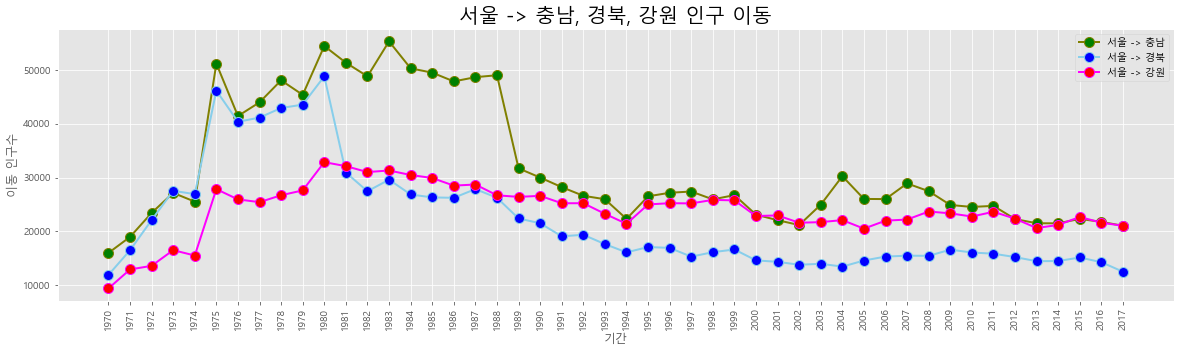

In [14]:
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도', :], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도', :], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도', :], marker='o', markerfacecolor='red', markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

ax.legend(loc='best')

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size = 20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.set_xticklabels(col_years, rotation=90)

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()

#### 예제 4-11. 화면 4분할 그래프

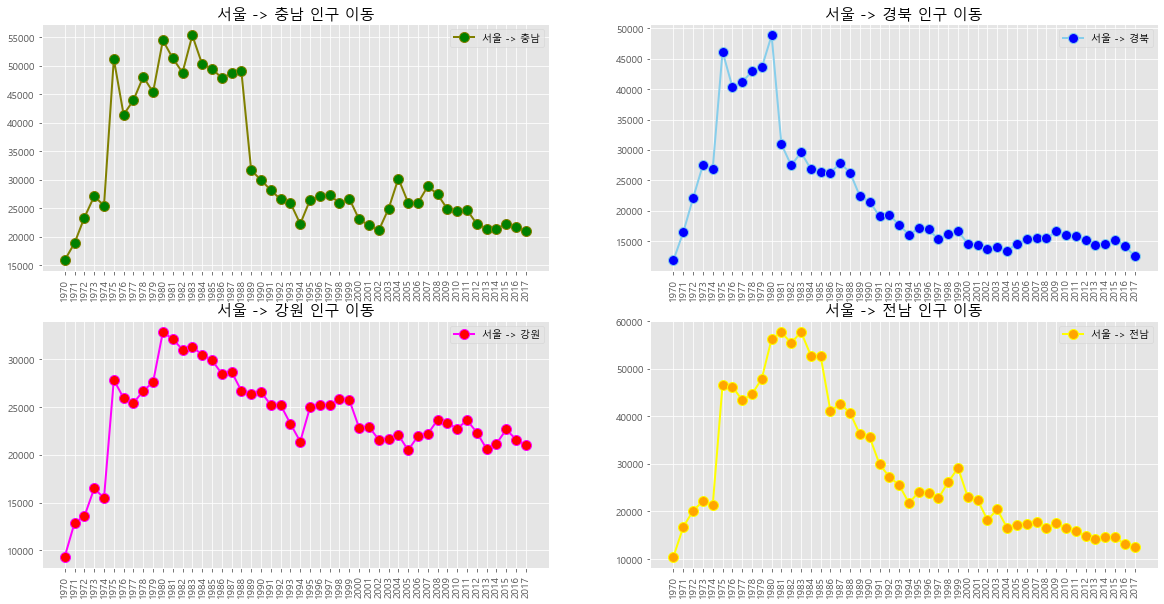

In [15]:
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

plt.style.use('ggplot') 

fig = plt.figure(figsize=(20, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', 
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

#### 예제 4-12. matplotlib 스타일 리스트 출력

In [16]:
import matplotlib

colors = {} 

# 컬러 이름과 헥사코드 
for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex

print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

#### 예제 4-13. 면적 그래프(stacked=False) 그리기

In [17]:
mask = (df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [18]:
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

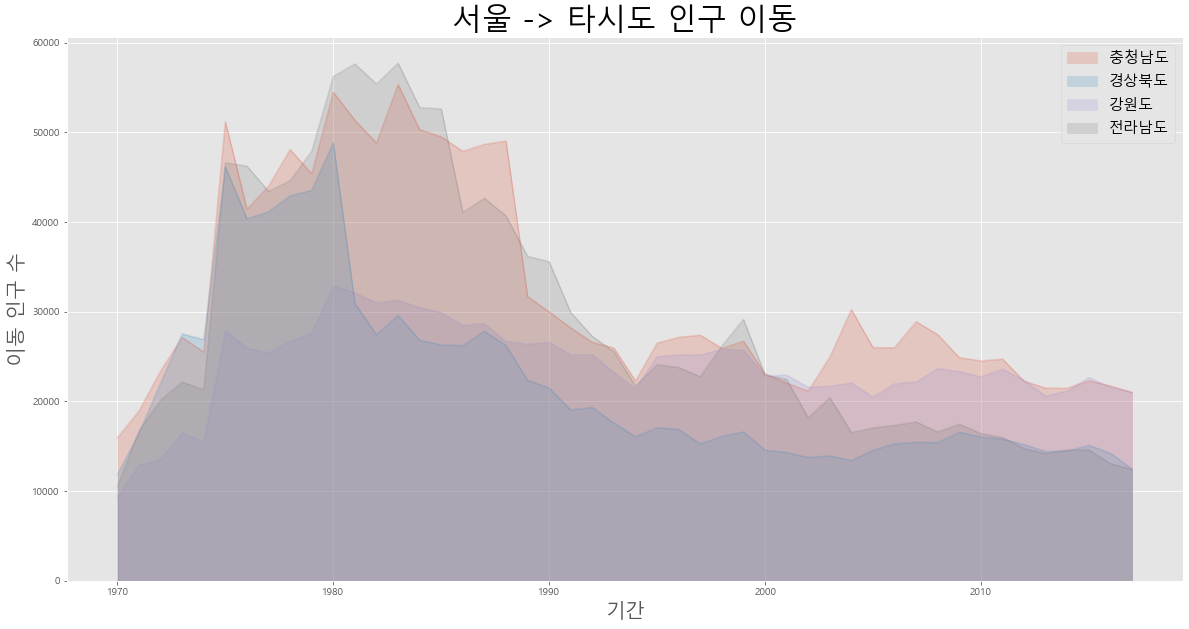

In [19]:
plt.style.use('ggplot')
df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=False, alpha = 0.2, figsize = (20,10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc='best', fontsize = 15)

plt.show()

#### 예제 4-14. 면적 그래프(stacked=True) 그리기

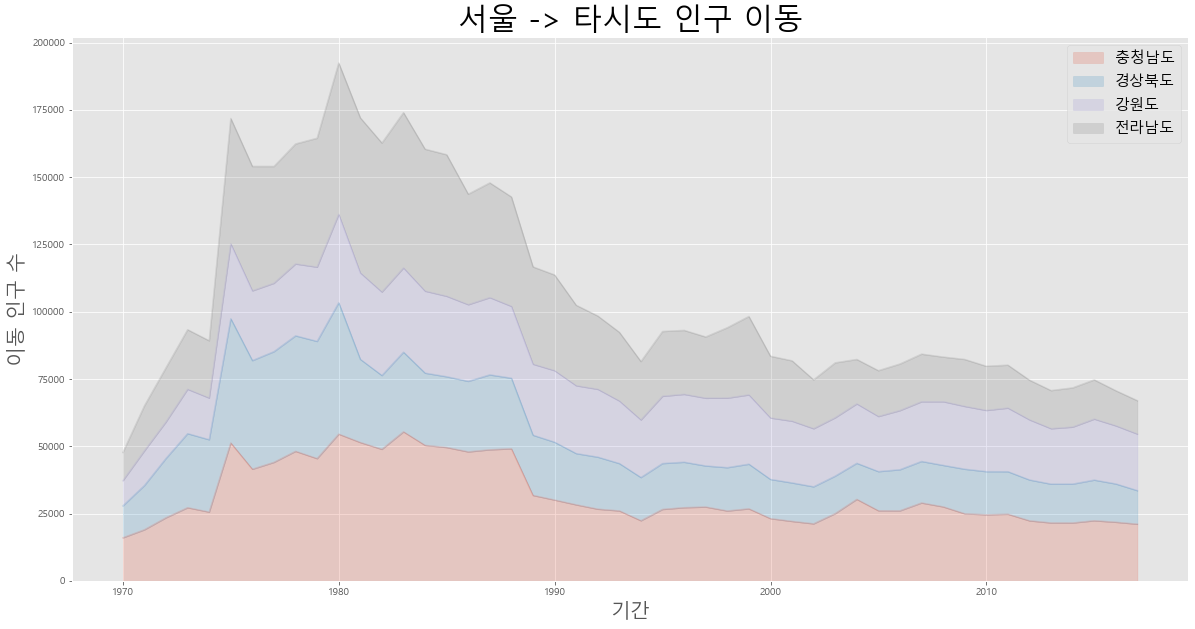

In [20]:
df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc='best', fontsize = 15)

plt.show()

#### 예제 4-15. axes 객체 속성 변경하기

In [21]:
df_4.index = df_4.index.map(int)

df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


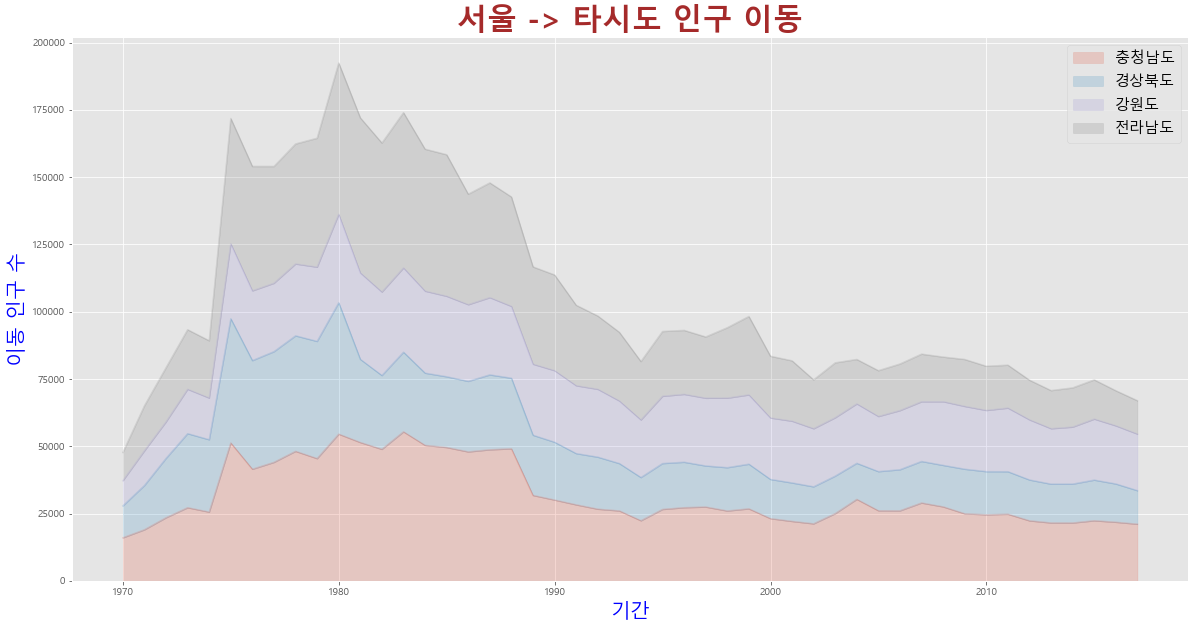

In [22]:
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))

ax.set_title('서울 -> 타시도 인구 이동', size = 30, color = 'brown', weight='bold')
ax.set_ylabel('이동 인구 수', size = 20, color='blue')
ax.set_xlabel('기간', size = 20, color='blue')
ax.legend(loc='best', fontsize = 15)

plt.show()

#### 예제 4-16. 세로형 막대 그래프

In [23]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


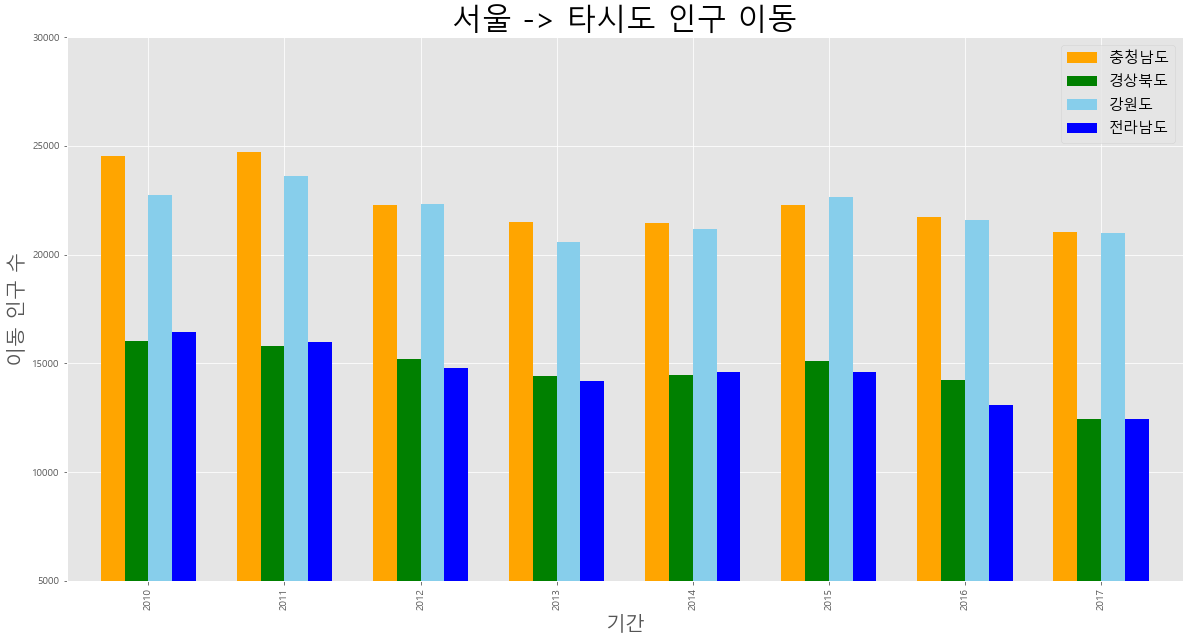

In [24]:

df_4.plot(kind='bar', figsize=(20,10), width=0.7, color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size = 20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

#### 예제 4-17. 가로형 막대 그래프

In [25]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

df_4['합계'] = df_4.sum(axis=1)
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

df_total

,합계
전입지,
전라남도,116035.0
경상북도,117740.0
강원도,175731.0
충청남도,179533.0


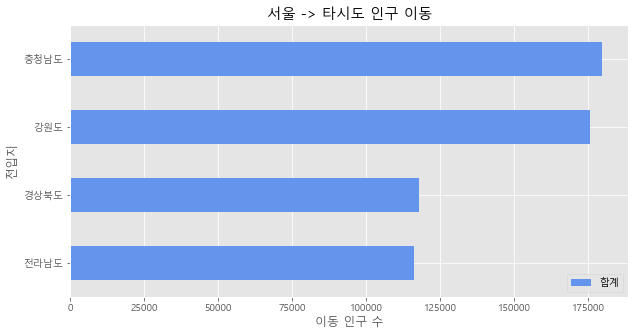

In [26]:
plt.style.use('ggplot')

df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

#### 예제 4-18. 2축 그래프 그리기

In [27]:
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

In [28]:
df = pd.read_excel('./samples/part4/남북한발전전력량.xlsx', engine = 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감률 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1) # 한칸씩 위에꺼 가져오기!
df['증감률'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100
df.head(5)

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.05415
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.5263
1994,231,138,93,-,221,4.52489


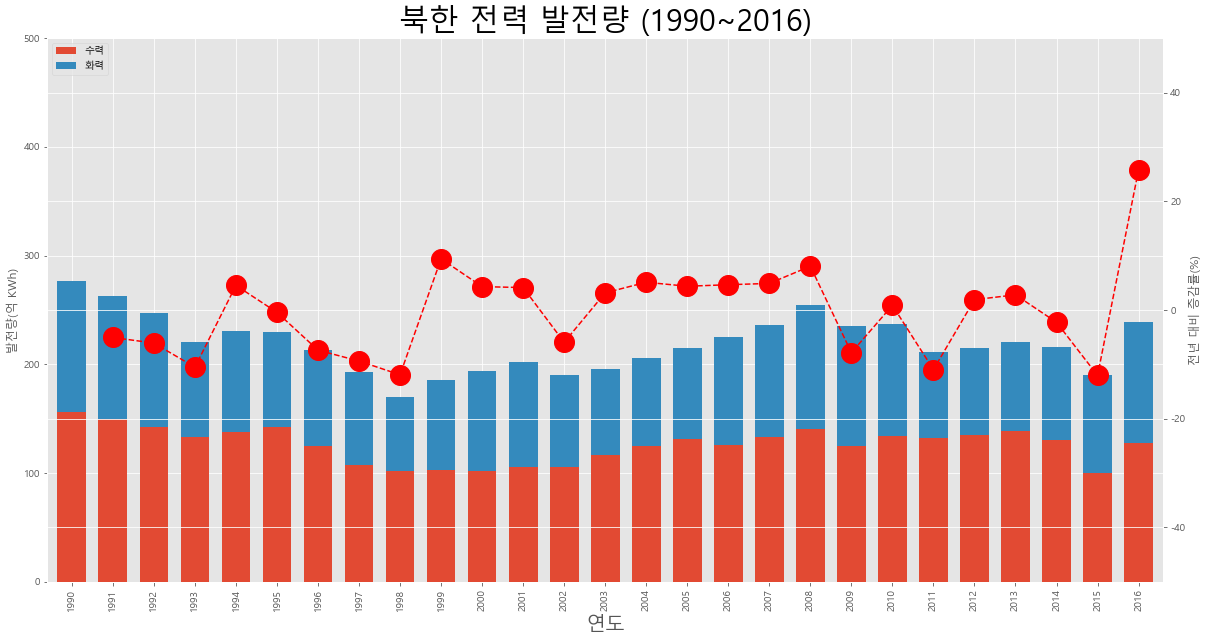

In [29]:
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=20, color='red', label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

#### 예제 4-19. 히스토그램

In [30]:
plt.style.use('classic')

df = pd.read_csv('./samples/part4/auto-mpg.csv', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year','origin', 'name']
df['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

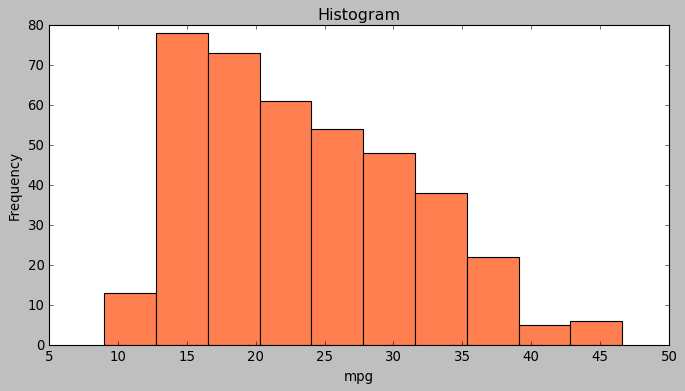

In [31]:
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

#### 예제 4-20. 산점도

In [32]:
df[['weight', 'mpg']]

,weight,mpg
0,3504.0,18.0
1,3693.0,15.0
2,3436.0,18.0
3,3433.0,16.0
4,3449.0,17.0
...,...,...
393,2790.0,27.0
394,2130.0,44.0
395,2295.0,32.0
396,2625.0,28.0


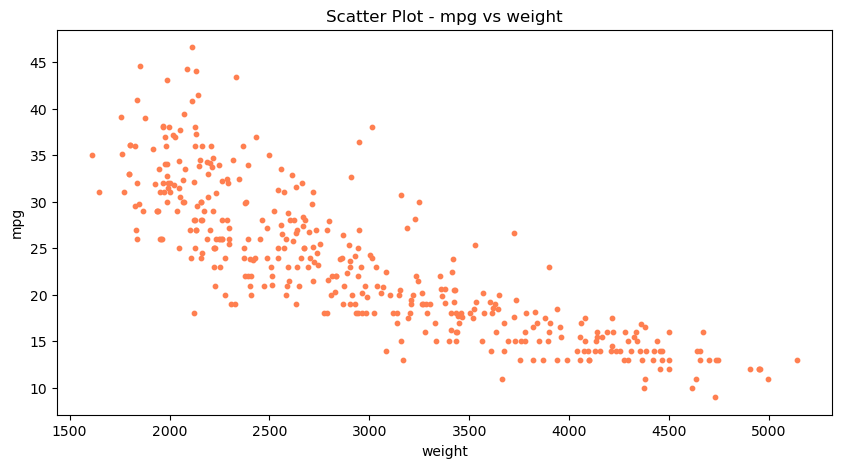

In [33]:
plt.style.use('default')
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

#### 예제 4-21. 버블 차트

In [34]:
cylinders_size = df.cylinders/df.cylinders.max() * 300

In [35]:
cylinders_size

0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
393    150.0
394    150.0
395    150.0
396    150.0
397    150.0
Name: cylinders, Length: 398, dtype: float64

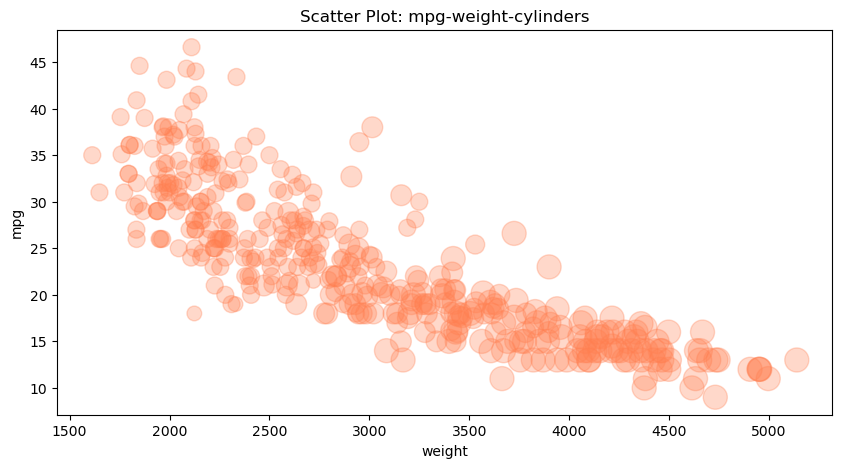

In [36]:
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10,5), s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

#### 예제 4-22. 그림 파일로 저장

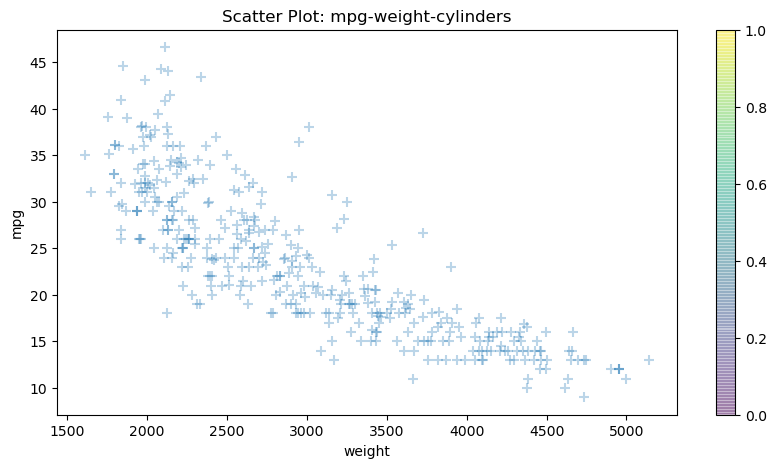

In [37]:
df.plot(kind='scatter', x='weight', y='mpg', cmap='viridis', marker='+', figsize=(10,5), s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig("./samples/part4/scatter.png")
plt.savefig("./samples/part4/scatter.png", transparent=True)

plt.show()

#### 예제 4-23. 파이 차트

In [38]:
df['count'] = 1
df_origin = df.groupby('origin').sum()
df_origin.index = ['USA', 'EU', 'JPN']
df_origin.head()

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JPN,2405.6,324,8114.0,175477.0,1277.6,6118,79


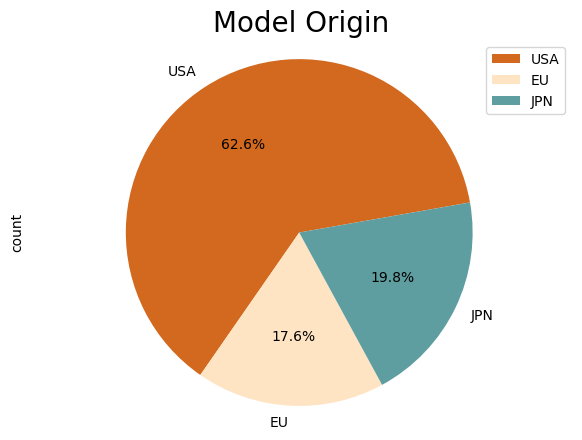

In [39]:
df_origin['count'].plot(kind='pie', figsize=(7, 5), autopct='%1.1f%%', startangle=10, colors=['chocolate', 'bisque', 'cadetblue'])

plt.title('Model Origin', size = 20)
plt.axis('equal') # 원에 가깝게
plt.legend(labels = df_origin.index, loc='upper right')
plt.show()

#### 예제 4-24. 박스 플롯

In [40]:
plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus']= False

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,count
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


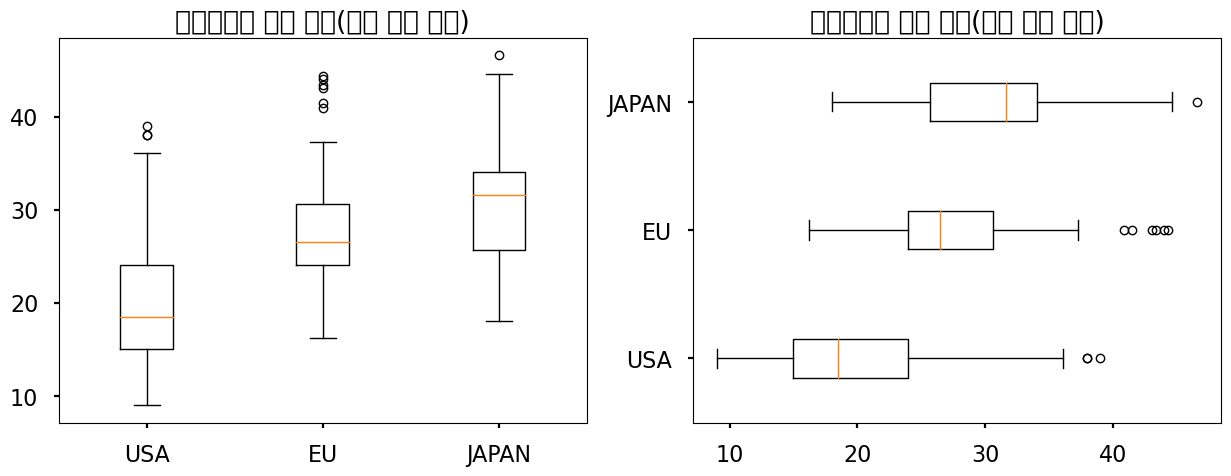

In [41]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
              labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
       labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

## 4-2. Seaborn 라이브러리 - 고급 그래프 도구

#### 예제 4-25. titanic 데이터셋

In [42]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


#### 예제 4-26. 회귀선이 있는 산점도

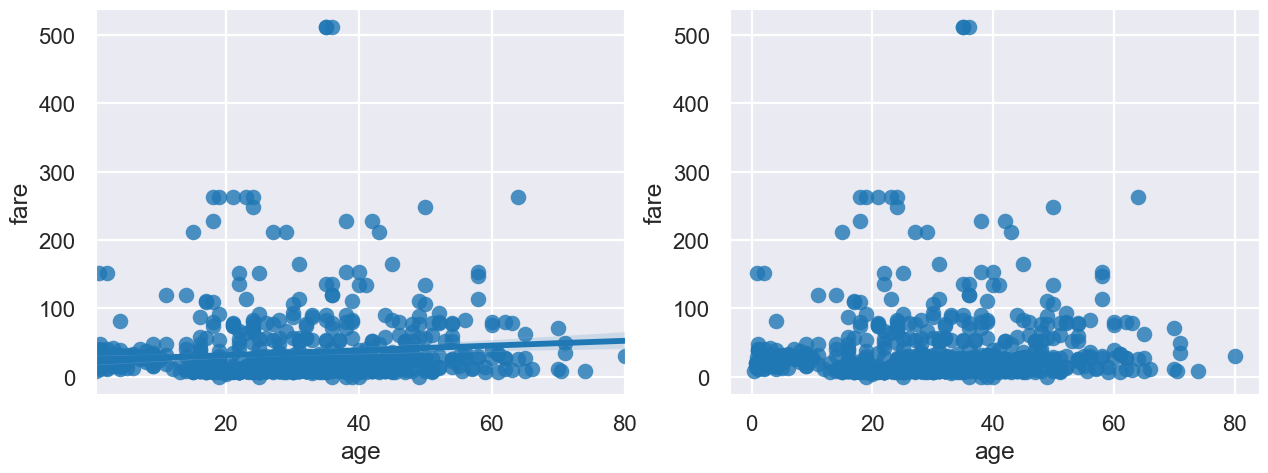

In [44]:
sns.set_style('darkgrid') # darkgrid, whitegrid, dark, white, ticks
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg=False)

plt.show()

#### 예제 4-27. 히스토그램/커널밀도함수

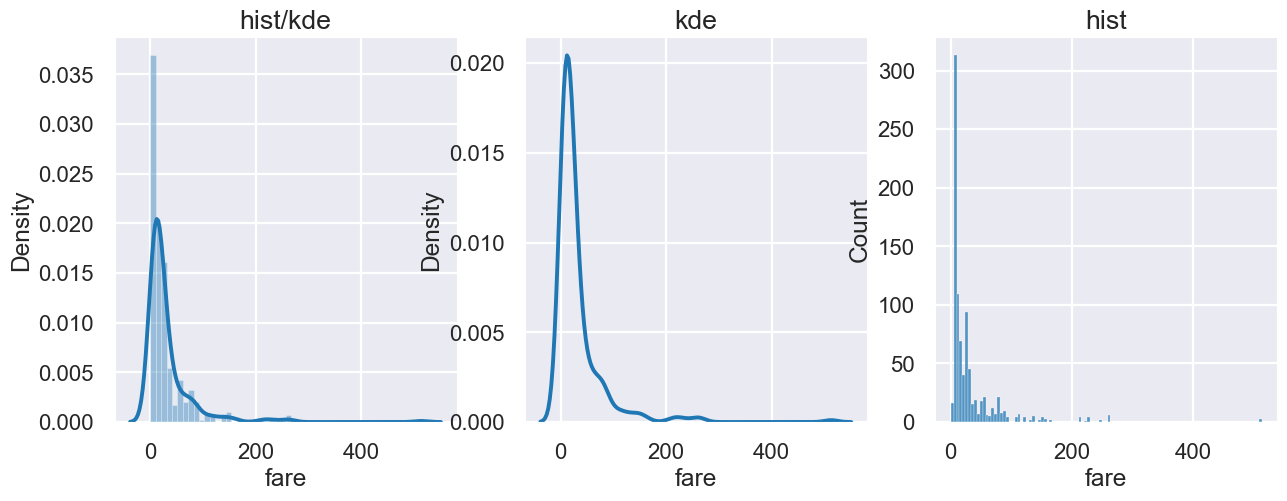

In [45]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(titanic['fare'], ax=ax1)

sns.kdeplot(titanic['fare'], ax=ax2)

sns.histplot(titanic['fare'], ax=ax3)

ax1.set_title('hist/kde')
ax2.set_title('kde')
ax3.set_title('hist')

plt.show()

#### 예제 4-28. 히트맵

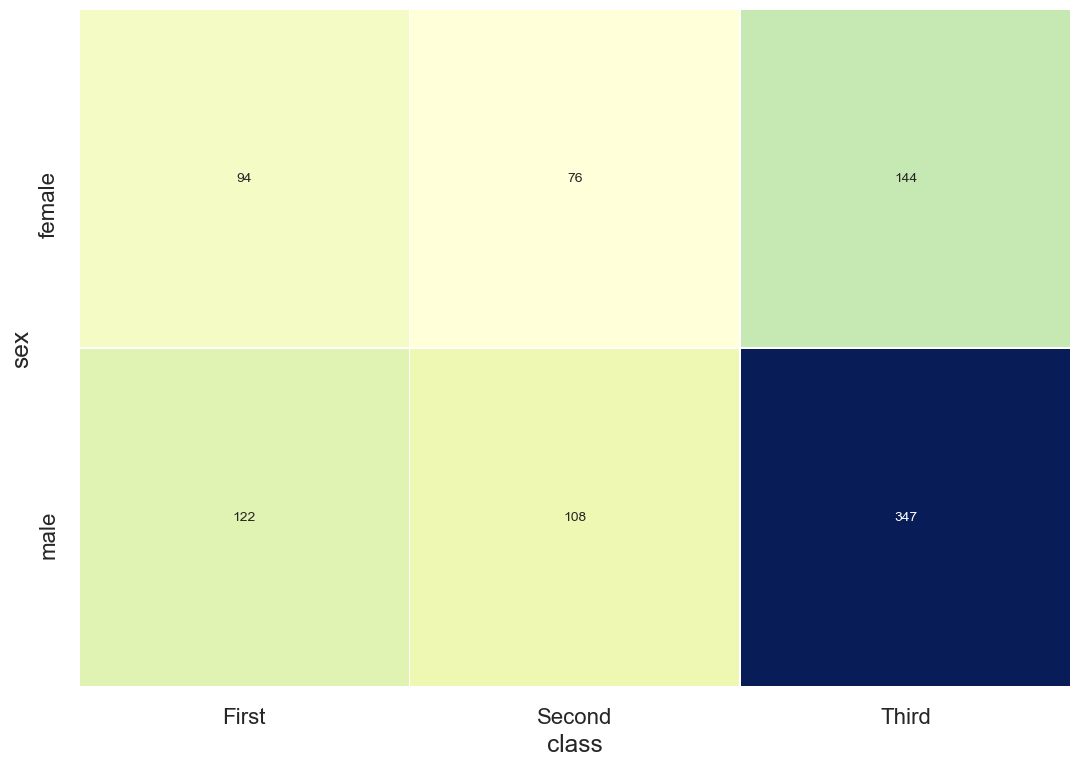

In [46]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu', linewidth=.5, cbar=False)

plt.show()

#### 예제 4-29. 범주형 데이터의 산점도

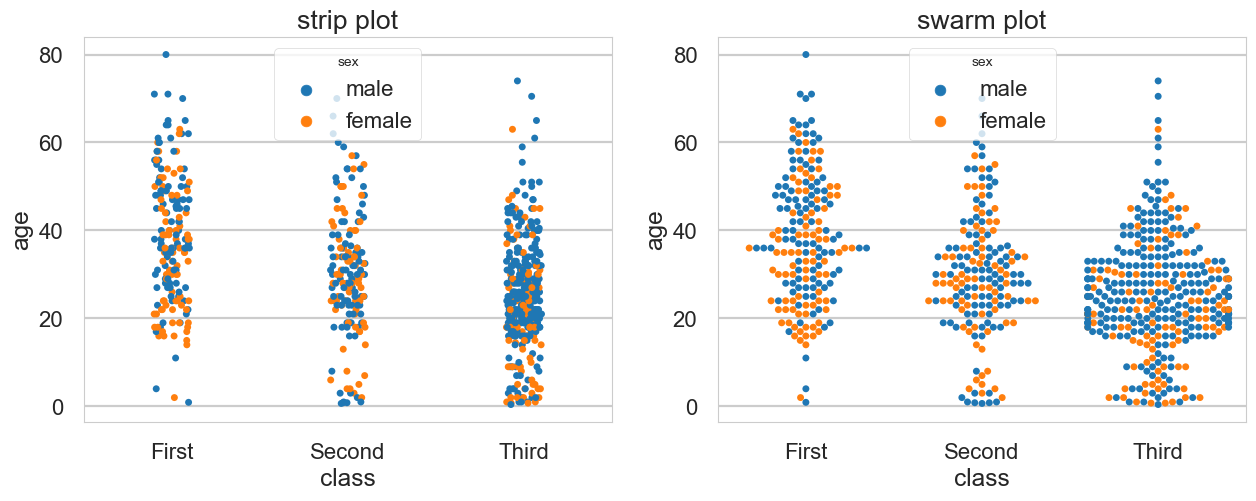

In [49]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x='class', y='age', data=titanic, ax=ax1, hue='sex')
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2, hue='sex')

ax1.set_title('strip plot')
ax2.set_title('swarm plot')

plt.show()

#### 예제 4-30. 막대 그래프

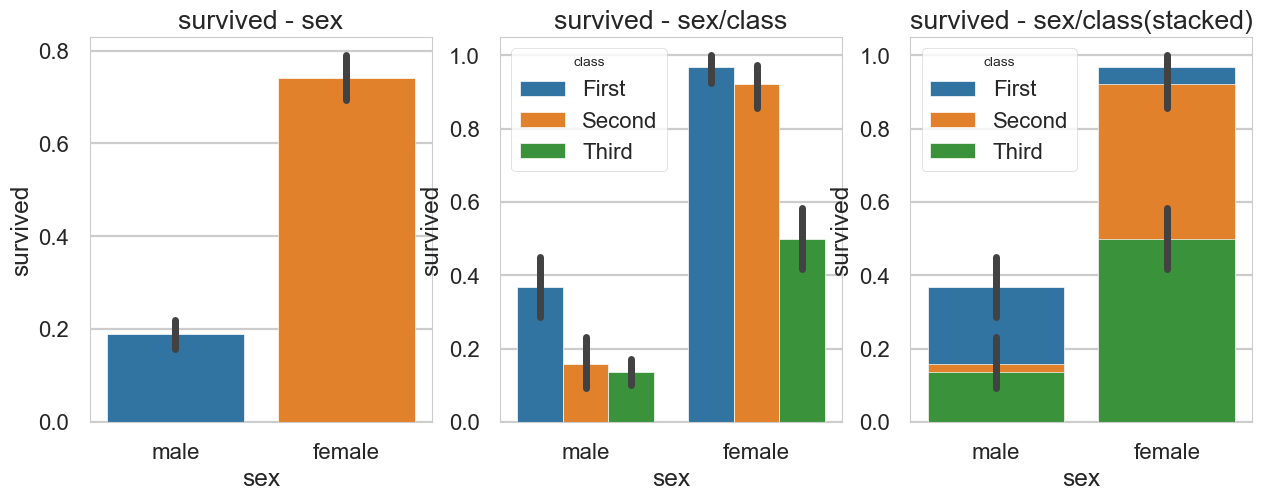

In [51]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

ax1.set_title('survived - sex')
ax2.set_title('survived - sex/class')
ax3.set_title('survived - sex/class(stacked)')

plt.show()

#### 예제 4-31. 빈도 그래프

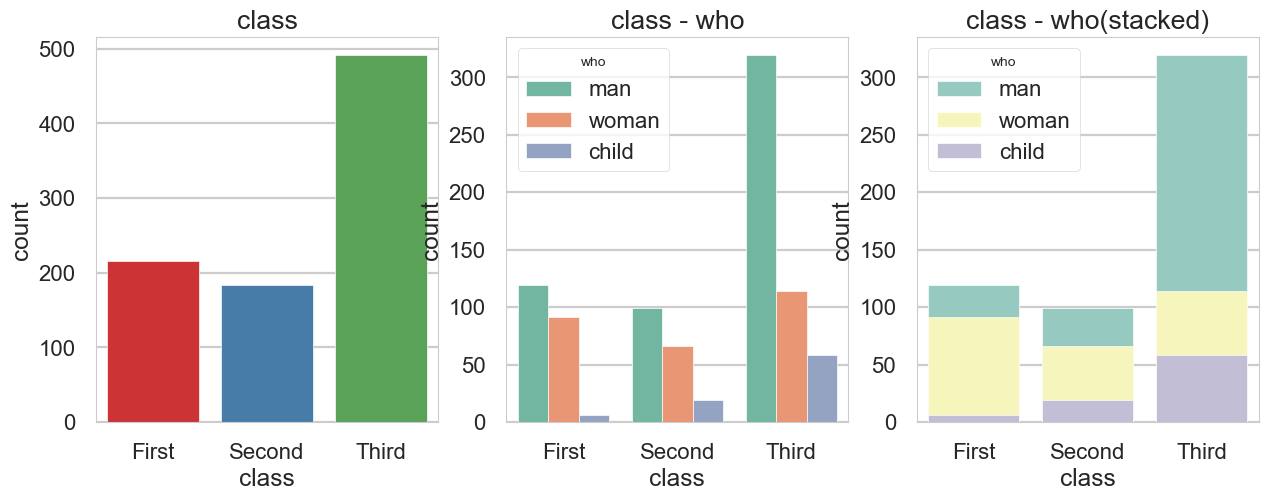

In [53]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

ax1.set_title('class')
ax2.set_title('class - who')
ax3.set_title('class - who(stacked)')

plt.show()

#### 예제 4-32. 바이올린 그래프

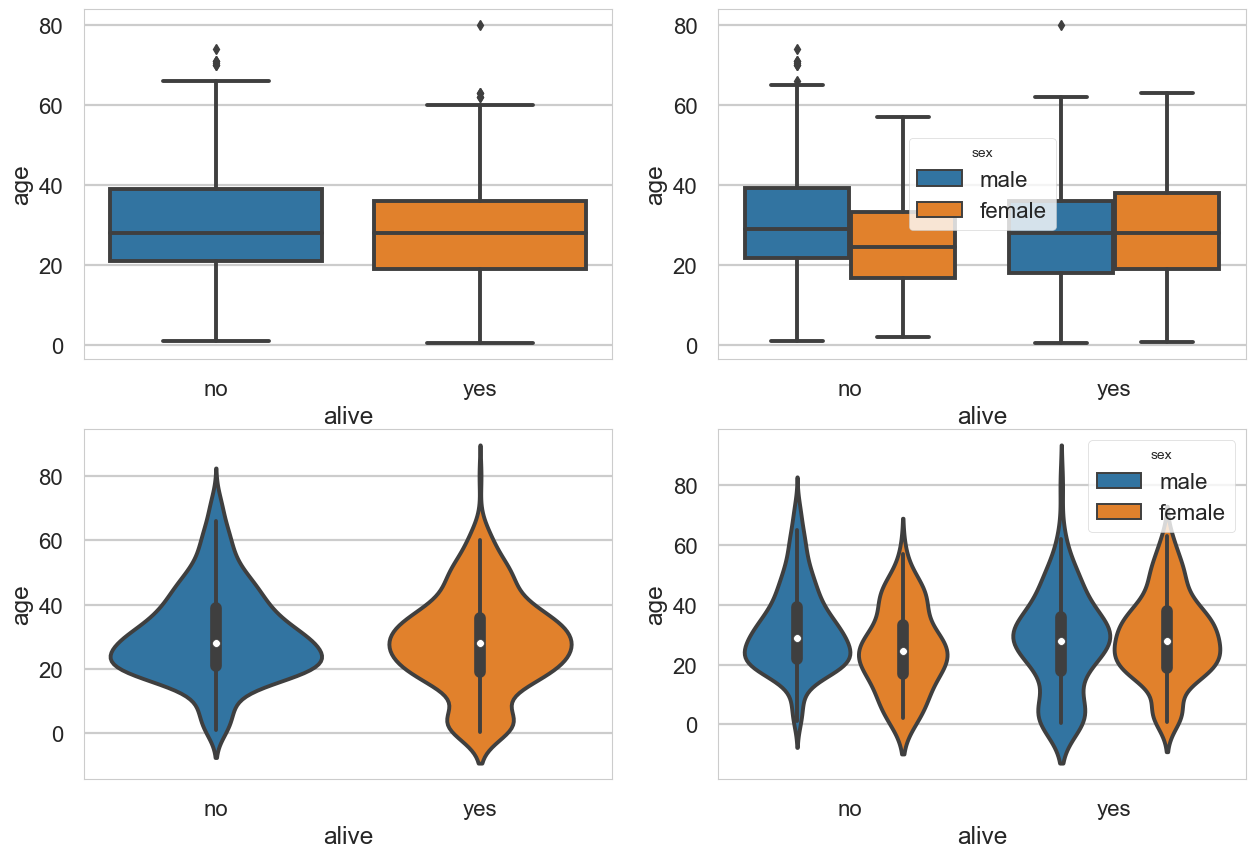

In [55]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

#### 예제 4-33. 조인트 그래프

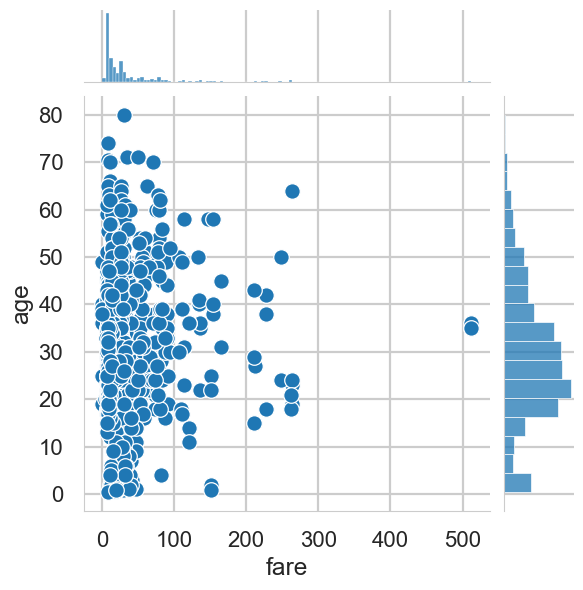

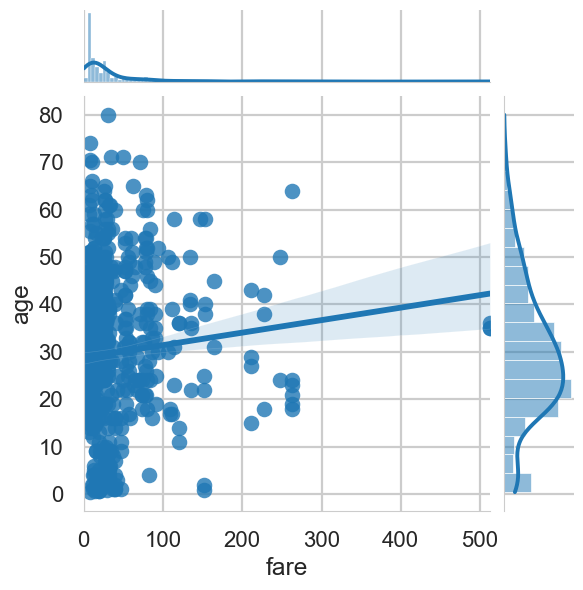

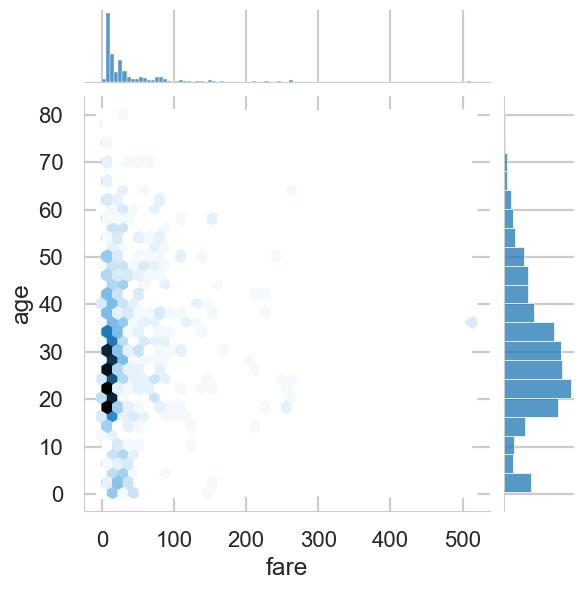

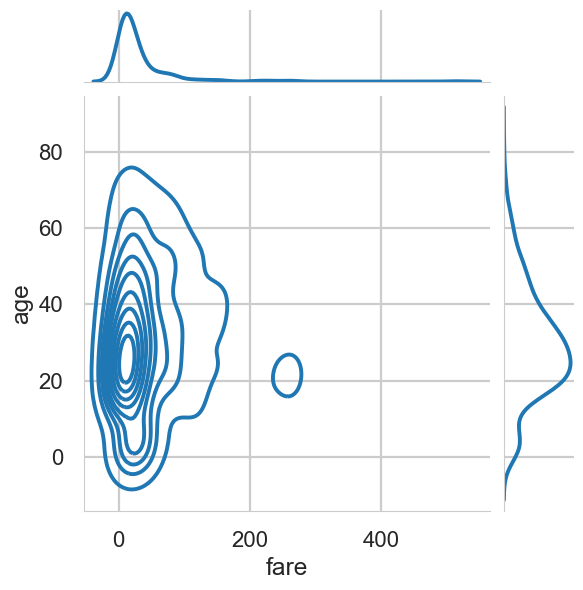

In [56]:

j1 = sns.jointplot(x='fare', y='age', data=titanic)
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

plt.show()

#### 예제 4-34. 조건에 맞게 화면 분할

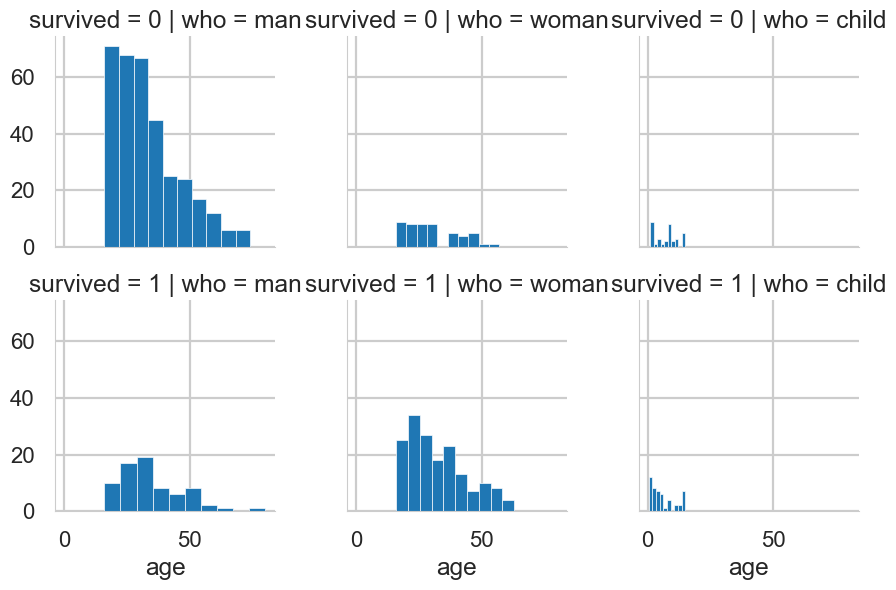

In [57]:
g = sns.FacetGrid(data=titanic, col='who', row='survived')

g = g.map(plt.hist, 'age')

#### 예제 4-35. 이변수 데이터 분포

In [60]:
titanic_pair = titanic[['age','pclass','fare']]
titanic_pair

,age,pclass,fare
0,22.0,3,7.2500
1,38.0,1,71.2833
2,26.0,3,7.9250
3,35.0,1,53.1000
4,35.0,3,8.0500
...,...,...,...
886,27.0,2,13.0000
887,19.0,1,30.0000
888,NaN,3,23.4500
889,26.0,1,30.0000


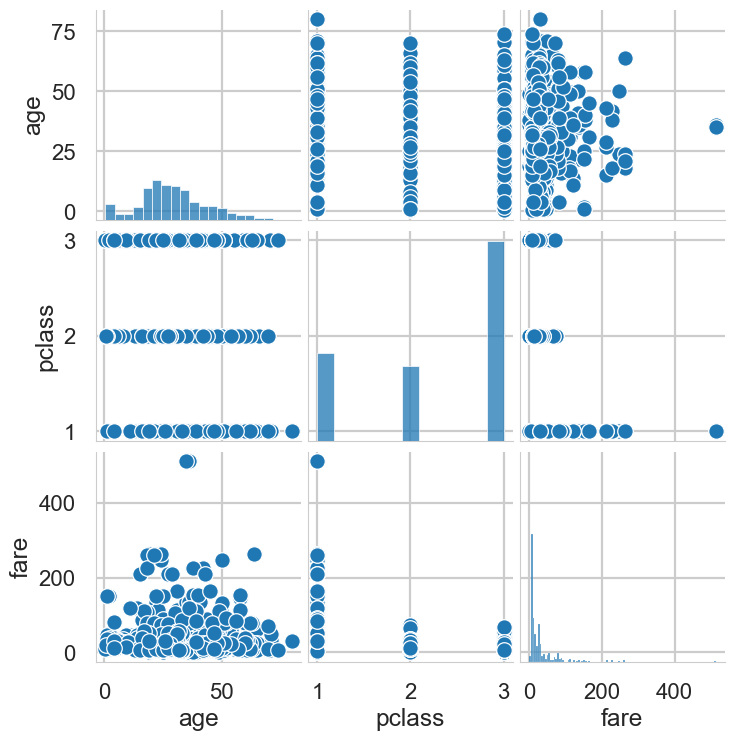

In [61]:
g = sns.pairplot(titanic_pair)

## 4-3. Folium 라이브러리 - 지도 활용

In [63]:
import folium

In [66]:
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)
seoul_map.save('./samples/part4/seoul.html')
seoul_map

#### 예제 4-37. 지도 스타일 적용

In [68]:
seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)
seoul_map3 = folium.Map(location=[37.55, 126.98], tiles='Stamen Toner', zoom_start=15)

In [69]:
seoul_map2

In [70]:
seoul_map3

#### 예제 4-38. 지도에 마커 표시하기

In [75]:
df = pd.read_excel('./samples/part4/서울지역 대학교 위치.xlsx', engine='openpyxl', index_col=0)

In [77]:

seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)

seoul_map

#### 예제 4-39. 지도에 원형 마커 표시

In [79]:
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng], radius = 10, color = 'brown', fill=True, fill_color='coral', fill_opacity=0.7, popup=name).add_to(seoul_map)
seoul_map

#### 예제 4-40. 지도 영역에 단계구분도 표시하기

In [82]:
file_path = './samples/part4/경기도인구데이터.xlsx'

In [87]:
df = pd.read_excel(file_path, index_col='구분', engine='openpyxl')
df.columns = df.columns.map(str)
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [93]:
geo_path = './samples/part4/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))
    
g_map = folium.Map(location=[37.5502, 126.982], tiles='Stamen Terrain', zoom_start=9)

year = '2017'

folium.Choropleth(geo_data=geo_data, data=df[year], columns=[df.index, df[year]], fill_color='YlOrRd', fill_opacity=0.7, 
                  line_opacity=0.3, threshold_scale=[10000, 100000, 300000, 500000, 700000], key_on='feature.properties.name').add_to(g_map)

g_map

In [ ]:
M